In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('CRM_reviews_2.csv')
df

,Index,Date,Review,Rating,Product,District
0,1,01/01/2015,"Reliable, not bad fast transactions wide range...",5,Mortgage,6
1,2,01/01/2015,Worried About Fraud But fast transactions wide...,5,Online Services,44
2,3,01/01/2015,Helped Me In A Case Of Fraud competitive rates...,5,Online Services,24
3,4,01/01/2015,Stable Interest Rate competitive rates easy on...,5,Online Services,65
4,5,01/01/2015,Where I Lost My Pin helpful customer service h...,5,Online Services,2
...,...,...,...,...,...,...
20948,20957,31/12/2016,What Happened To This Bank?? long wait times n...,1,Online Services,27
20949,20958,31/12/2016,Soo Frustrating!Strange bad advice WHY!? frust...,1,Online Services,51
20950,20959,31/12/2016,Slow Transactions long wait times complicated ...,1,Online Services,73
20951,20960,31/12/2016,Bad Advice complicated to figure out what happ...,1,Online Services,9


## Create separate dataframes for Online Services and Mortgages

In [4]:
online = df[df['Product'] == 'Online Services']

In [5]:
mortgage = df[df['Product'] == 'Mortgage']

### Import packages

In [6]:
import nltk
from nltk.classify import naivebayes

# Download the necessary NLTK data
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.classify import NaiveBayesClassifier
from nltk.classify.util import accuracy

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from collections import Counter

import matplotlib.pyplot as plt

In [7]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def remove_stopwords_and_lemmatize(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words and lemmatize the tokens
    filtered_tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.lower() not in stop_words and word.isalpha()]
    # Reconstruct the text without stop words
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

## Online Services - Using above function remove stopwords and lemmatize

In [8]:
online_1 = online[online['Rating'] == 1].copy()

online_1['Review'] = online_1['Review'].apply(remove_stopwords_and_lemmatize)

online_5 = online[online['Rating'] == 5].copy()

online_5['Review'] = online_5['Review'].apply(remove_stopwords_and_lemmatize)

In [9]:
print('number of 1-star Online Service reviews {}'.format(len(online_1)))
print('number of 5-star Online Service reviews {}'.format(len(online_5)))

number of 1-star Online Service reviews 7093
number of 5-star Online Service reviews 12027


### Create Tokens

In [10]:
online_1['Tokens'] = online_1['Review'].apply(word_tokenize)
online_5['Tokens'] = online_5['Review'].apply(word_tokenize)

## Q1 Part 1 - Customers that had trouble accessing their online account - Regex

In [11]:
import re

r - This just indicates that the following string is a "raw" string literal in Python. It's a good practice to use raw strings when defining regular expressions because it ensures that backslashes are treated as literal characters.

.* - This part of the pattern matches any sequence of characters (.*), where:

. matches any character (except for newline characters).

(star) * means "zero or more" of the preceding character or group, so .* means "zero or more of any character." \s - This matches any whitespace character, such as space, tab, or newline.
[Cc] - This part is a character set that matches either "C" or "c". So, it will match either "C" or "c".

ats? - This part matches "at" followed by an optional "s". The ? means "zero or one" occurrence of the preceding character, so s? matches either "s" or nothing.

\s - Another whitespace character, as explained earlier.

.* - Another sequence of zero or more characters.

So, putting it all together:

.* at the beginning and end means the pattern can occur anywhere. \s[Cc]ats?\s means there could be a word like "cat" or "cats" (case insensitive) surrounded by whitespace characters. Therefore, the whole pattern will match any string that contains a word "cat" or "cats" (case insensitive), regardless of what comes before or after it, with optional surrounding whitespace

(cats?|dogs?) is a group that matches either "cat" or "cats" OR "dog" or "dogs"..ere in the string.

In [12]:
acc_access = []

access_words = re.compile(r'.*\sonline\s+banking?')

acc_access_df = online_1[[bool(access_words.search(str(review))) for review in online_1['Review']]]
acc_access_df

,Index,Date,Review,Rating,Product,District,Tokens
12,13,01/01/2015,complicated online banking additional charge c...,1,Online Services,74,"[complicated, online, banking, additional, cha..."
18,19,01/01/2015,frustrate complicated online banking great great,1,Online Services,52,"[frustrate, complicated, online, banking, grea..."
19,20,01/01/2015,error happened bank lost detail staff unhelpfu...,1,Online Services,6,"[error, happened, bank, lost, detail, staff, u..."
20,21,01/01/2015,additional charge complicated online banking l...,1,Online Services,20,"[additional, charge, complicated, online, bank..."
36,37,02/01/2015,frustrating complicated online banking rude cu...,1,Online Services,15,"[frustrating, complicated, online, banking, ru..."
...,...,...,...,...,...,...,...
20908,20917,30/12/2017,long wait time complicated figure frustrating ...,1,Online Services,12,"[long, wait, time, complicated, figure, frustr..."
20922,20931,31/12/2015,lost detail staff unhelpful complicated online...,1,Online Services,35,"[lost, detail, staff, unhelpful, complicated, ..."
20925,20934,31/12/2015,long wait time poor interest rate complicated ...,1,Online Services,7,"[long, wait, time, poor, interest, rate, compl..."
20947,20956,31/12/2016,great complicated online banking error kept cr...,1,Online Services,38,"[great, complicated, online, banking, error, k..."


In [13]:
# Tokens to remove
tokens_to_remove = ["online", "banking", "happened"]

def filter_tokens(tokens):
    return [token for token in tokens if token not in tokens_to_remove]

# Apply the function to the 'Tokens' column
acc_access_df_2 = acc_access_df.copy()
acc_access_df_2['Tokens'] = acc_access_df['Tokens'].apply(filter_tokens)

acc_access_df_2

,Index,Date,Review,Rating,Product,District,Tokens
12,13,01/01/2015,complicated online banking additional charge c...,1,Online Services,74,"[complicated, additional, charge, complicated]"
18,19,01/01/2015,frustrate complicated online banking great great,1,Online Services,52,"[frustrate, complicated, great, great]"
19,20,01/01/2015,error happened bank lost detail staff unhelpfu...,1,Online Services,6,"[error, bank, lost, detail, staff, unhelpful, ..."
20,21,01/01/2015,additional charge complicated online banking l...,1,Online Services,20,"[additional, charge, complicated, lost, detail..."
36,37,02/01/2015,frustrating complicated online banking rude cu...,1,Online Services,15,"[frustrating, complicated, rude, customer, ser..."
...,...,...,...,...,...,...,...
20908,20917,30/12/2017,long wait time complicated figure frustrating ...,1,Online Services,12,"[long, wait, time, complicated, figure, frustr..."
20922,20931,31/12/2015,lost detail staff unhelpful complicated online...,1,Online Services,35,"[lost, detail, staff, unhelpful, complicated, ..."
20925,20934,31/12/2015,long wait time poor interest rate complicated ...,1,Online Services,7,"[long, wait, time, poor, interest, rate, compl..."
20947,20956,31/12/2016,great complicated online banking error kept cr...,1,Online Services,38,"[great, complicated, error, kept, cropping, co..."


In [14]:
# Flatten the list of all token lists and count the word frequencies
all_words3 = [word for tokens in acc_access_df_2['Tokens'] for word in tokens]
word_freq3 = Counter(all_words3)

# Get the most common words
most_common_words3 = word_freq3.most_common()

# Print the most common words
for word, freq in most_common_words3[:20]:
    print(f"{word}: {freq}")

complicated: 2546
service: 945
error: 929
frustrating: 897
bank: 506
figure: 505
lost: 502
detail: 502
staff: 502
unhelpful: 502
additional: 480
charge: 480
limited: 480
kept: 475
cropping: 475
frustrate: 470
slow: 467
transaction: 467
rude: 465
customer: 465


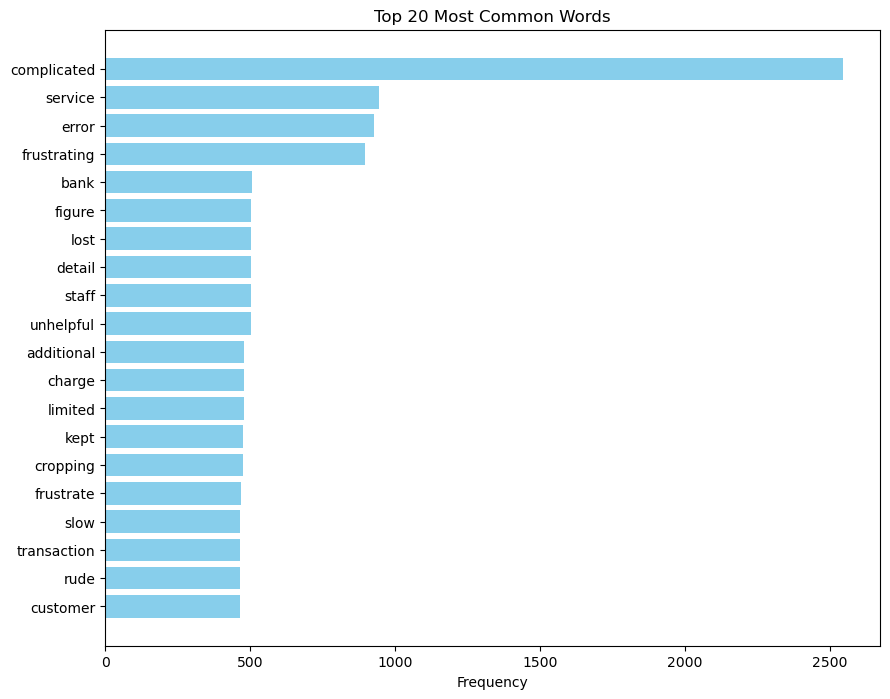

In [15]:
# Assuming most_common_words contains the top N words you want to display
top_words_access3 = [word for word, freq in most_common_words3[:20]]
top_freqs_access3 = [freq for word, freq in most_common_words3[:20]]

# Create a horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(top_words_access3, top_freqs_access3, color='skyblue')
plt.xlabel('Frequency')
plt.title('Top 20 Most Common Words')
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest values at the top
plt.show()

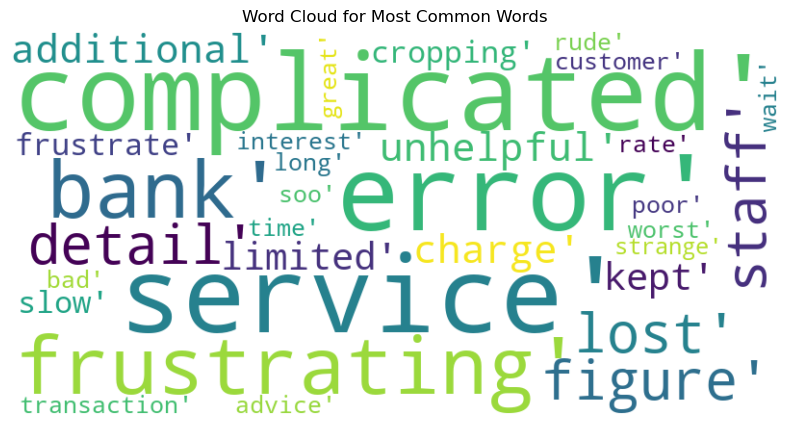

In [16]:
most_common_words3 = str(most_common_words3)

from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis')
    
# Generate word cloud
wordcloud.generate(most_common_words3)
    
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(f'Word Cloud for Most Common Words')
plt.axis('off')
plt.show()

## Q1 Part 2 - Online, rating 1 - Most common words

In [17]:
online_1.sample(5)

,Index,Date,Review,Rating,Product,District,Tokens
16207,16215,20/08/2017,worst rude customer service complicated online...,1,Online Services,10,"[worst, rude, customer, service, complicated, ..."
14343,14350,24/06/2016,worst lost detail staff unhelpful lost detail ...,1,Online Services,53,"[worst, lost, detail, staff, unhelpful, lost, ..."
12231,12238,25/04/2015,complicated figure error kept cropping great l...,1,Online Services,30,"[complicated, figure, error, kept, cropping, g..."
7558,7564,04/09/2017,error kept cropping long wait time complicated...,1,Online Services,9,"[error, kept, cropping, long, wait, time, comp..."
5530,5535,04/12/2016,rude customer service frustrate error complica...,1,Online Services,70,"[rude, customer, service, frustrate, error, co..."


In [18]:
all_words = [word for tokens in online_1['Tokens'] for word in tokens]
word_freq = Counter(all_words)

most_common_words = word_freq.most_common()

for word, freq in most_common_words[:20]:
    print(f"{word}: {freq}")

error: 4183
complicated: 4175
service: 4151
frustrating: 4130
additional: 2135
charge: 2135
figure: 2134
great: 2102
rude: 2099
customer: 2099
worst: 2097
slow: 2093
transaction: 2093
kept: 2086
cropping: 2086
frustrate: 2078
poor: 2068
interest: 2068
rate: 2068
soo: 2059


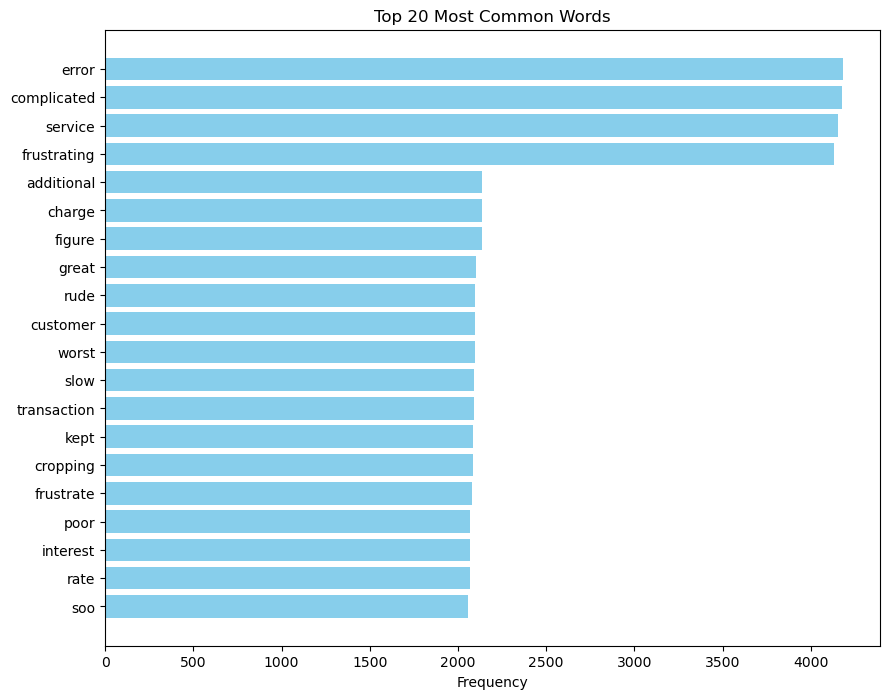

In [19]:
top_words = [word for word, freq in most_common_words[:20]]
top_freqs = [freq for word, freq in most_common_words[:20]]

plt.figure(figsize=(10, 8))
plt.barh(top_words, top_freqs, color='skyblue')
plt.xlabel('Frequency')
plt.title('Top 20 Most Common Words')
plt.gca().invert_yaxis() 
plt.show()

In [20]:
most_common_words = str(most_common_words)

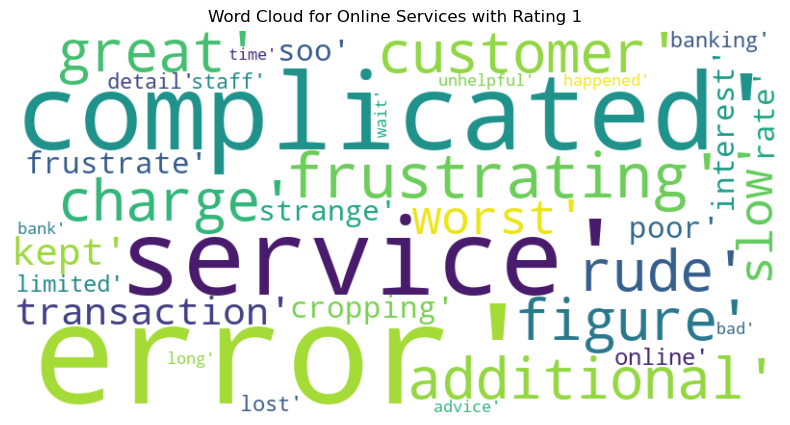

In [21]:
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis')

wordcloud.generate(most_common_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(f'Word Cloud for Online Services with Rating 1')
plt.axis('off')
plt.show()

## Online, rating 5 - Most common words

In [22]:
all_words1 = [word for tokens in online_5['Tokens'] for word in tokens]
word_freq1 = Counter(all_words1)

most_common_words1 = word_freq1.most_common()

for word, freq in most_common_words1[:20]:
    print(f"{word}: {freq}")

fraud: 14219
service: 9564
rate: 9320
wide: 4794
range: 4794
waved: 4793
fee: 4793
responded: 4791
quick: 4791
helpful: 4770
customer: 4770
secure: 4766
helped: 4752
case: 4752
easy: 4733
online: 4733
banking: 4733
efficient: 4702
worried: 4701
friendly: 4674


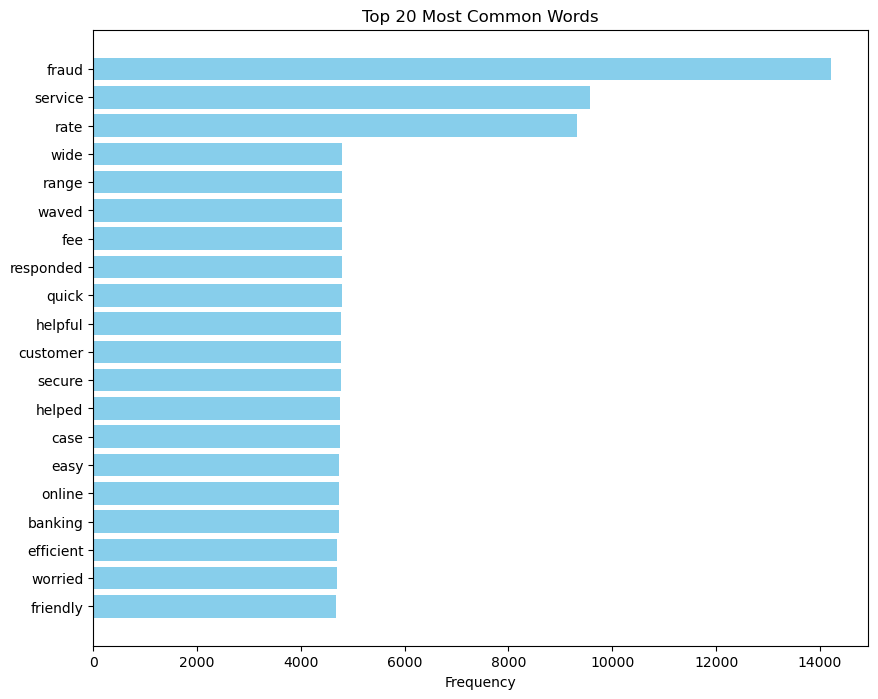

In [23]:
top_words1 = [word for word, freq in most_common_words1[:20]]
top_freqs1 = [freq for word, freq in most_common_words1[:20]]

plt.figure(figsize=(10, 8))
plt.barh(top_words1, top_freqs1, color='skyblue')
plt.xlabel('Frequency')
plt.title('Top 20 Most Common Words')
plt.gca().invert_yaxis()  
plt.show()

In [24]:
most_common_words1 = str(most_common_words1)

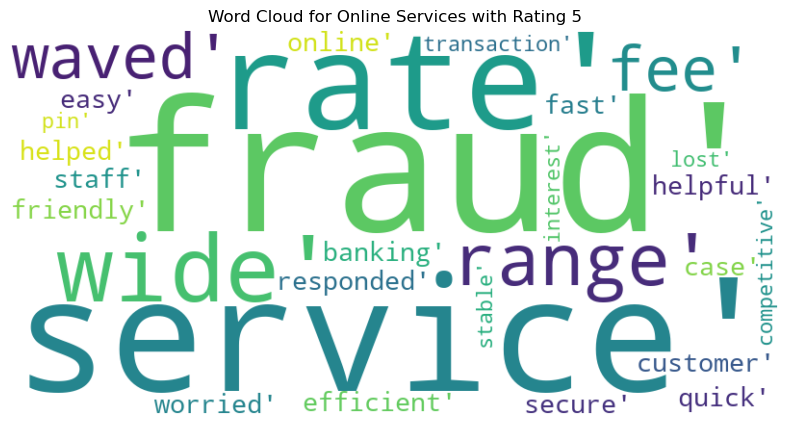

In [25]:
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis')

wordcloud.generate(most_common_words1)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(f'Word Cloud for Online Services with Rating 5')
plt.axis('off')
plt.show()

### Side by Side Comparison

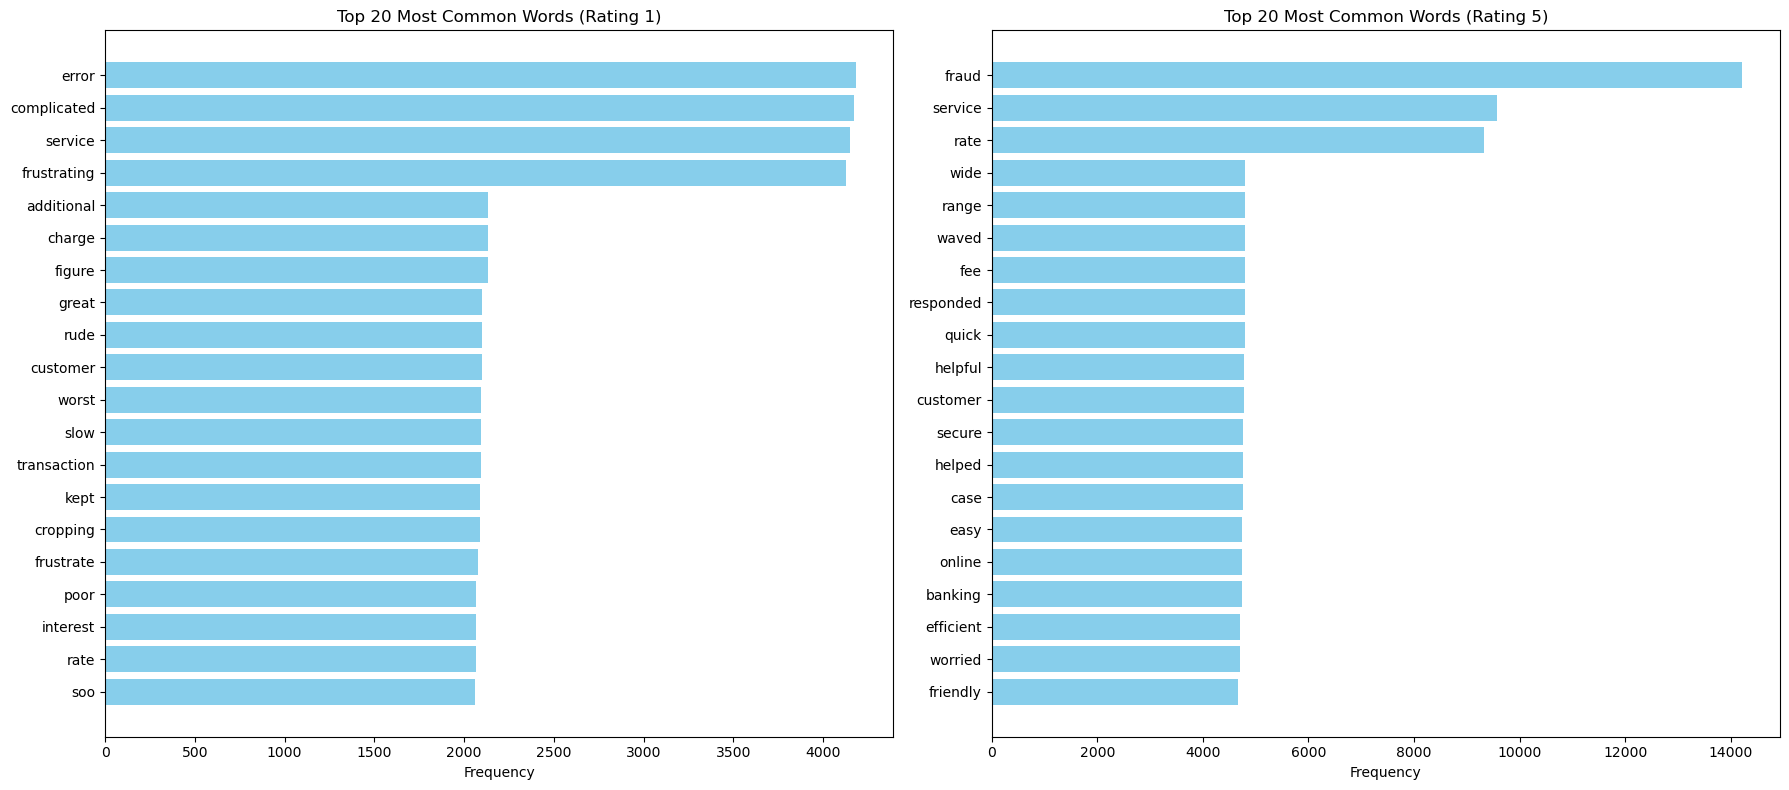

In [80]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

axes[0].barh(top_words, top_freqs, color='skyblue')
axes[0].set_xlabel('Frequency')
axes[0].set_title('Top 20 Most Common Words (Rating 1)')
axes[0].invert_yaxis()  

# Plot the second bar chart
axes[1].barh(top_words1, top_freqs1, color='skyblue')
axes[1].set_xlabel('Frequency')
axes[1].set_title('Top 20 Most Common Words (Rating 5)')
axes[1].invert_yaxis()  

plt.tight_layout()

plt.show()

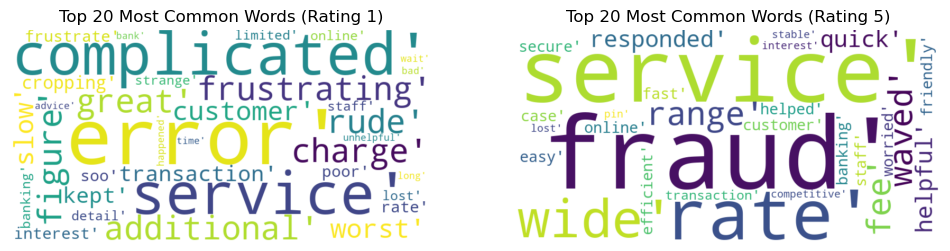

In [81]:
wordcloud1 = WordCloud(width=800, height=400, background_color='white').generate(most_common_words)

wordcloud2 = WordCloud(width=800, height=400, background_color='white').generate(most_common_words1)

plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)  
plt.imshow(wordcloud1, interpolation='bilinear')
plt.title('Top 20 Most Common Words (Rating 1)')
plt.axis('off')

plt.subplot(1, 2, 2)  
plt.imshow(wordcloud2, interpolation='bilinear')
plt.title('Top 20 Most Common Words (Rating 5)')
plt.axis('off')

plt.show()

## Q1 Advanced - Vectoriser and TFIDF - Online Services

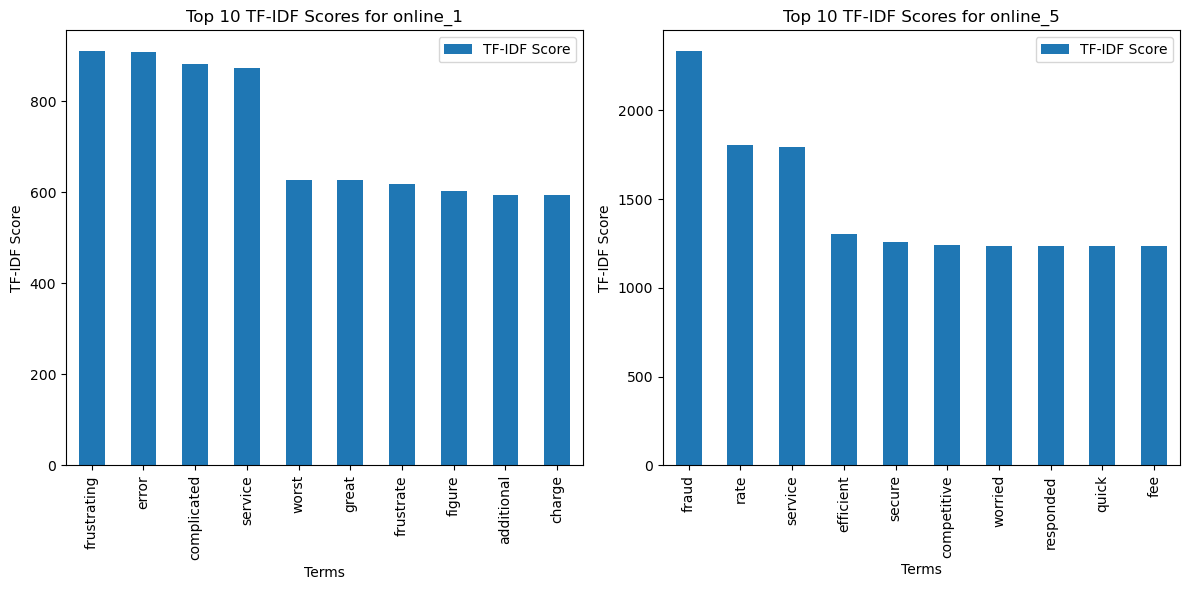

In [26]:
# Use your custom stop words list
vectorizer = TfidfVectorizer(stop_words=stop_words)

# Initialize the TF-IDF Vectorizer with custom stop words
vectorizer_1 = TfidfVectorizer()
vectorizer_5 = TfidfVectorizer()

# Fit and transform the text data using the vectorizer
tfidf_matrix_1 = vectorizer_1.fit_transform(online_1['Review'])
tfidf_matrix_5 = vectorizer_5.fit_transform(online_5['Review'])

# Get the feature names (terms)
feature_names_1 = vectorizer_1.get_feature_names_out()
feature_names_5 = vectorizer_5.get_feature_names_out()

# Sum up the TF-IDF scores across all documents
tfidf_sum_1 = tfidf_matrix_1.sum(axis=0)
tfidf_sum_5 = tfidf_matrix_5.sum(axis=0)

# Create DataFrame for TF-IDF scores
df_tfidf_1 = pd.DataFrame(tfidf_sum_1.T, index=feature_names_1, columns=["TF-IDF Score"])
df_tfidf_5 = pd.DataFrame(tfidf_sum_5.T, index=feature_names_5, columns=["TF-IDF Score"])

# Sort the DataFrame by TF-IDF score
df_tfidf_1_sorted = df_tfidf_1.sort_values(by="TF-IDF Score", ascending=False)
df_tfidf_5_sorted = df_tfidf_5.sort_values(by="TF-IDF Score", ascending=False)

# Plot the top N terms as a bar chart
top_n = 10  # Change to the number of terms you want to visualize

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
df_tfidf_1_sorted.head(top_n).plot(kind='bar', ax=plt.gca())
plt.title('Top {} TF-IDF Scores for online_1'.format(top_n))
plt.xlabel('Terms')
plt.ylabel('TF-IDF Score')

plt.subplot(1, 2, 2)
df_tfidf_5_sorted.head(top_n).plot(kind='bar', ax=plt.gca())
plt.title('Top {} TF-IDF Scores for online_5'.format(top_n))
plt.xlabel('Terms')
plt.ylabel('TF-IDF Score')

plt.tight_layout()
plt.show()

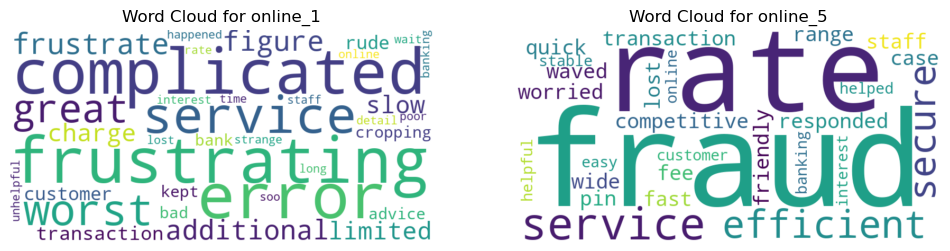

In [27]:
# Create a dictionary of term-frequency pairs for word cloud
word_freq_1 = {term: tfidf_sum_1[0, idx] for idx, term in enumerate(feature_names_1)}
word_freq_5 = {term: tfidf_sum_5[0, idx] for idx, term in enumerate(feature_names_5)}

# Create WordCloud objects
wordcloud_1 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_1)
wordcloud_5 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_5)

# Plot the word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_1, interpolation='bilinear')
plt.title('Word Cloud for online_1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_5, interpolation='bilinear')
plt.title('Word Cloud for online_5')
plt.axis('off')

plt.show()


## Rating 1

In [28]:
# Get feature names
feature_names = vectorizer_1.get_feature_names_out()

# Print feature names
print("Feature names:", feature_names)

# Print TF-IDF matrix
print("TF-IDF matrix:")
print(tfidf_matrix_1.toarray())


Feature names: ['additional' 'advice' 'bad' 'bank' 'banking' 'charge' 'complicated'
 'cropping' 'customer' 'detail' 'error' 'figure' 'frustrate' 'frustrating'
 'great' 'happened' 'interest' 'kept' 'limited' 'long' 'lost' 'online'
 'poor' 'rate' 'rude' 'service' 'slow' 'soo' 'staff' 'strange' 'time'
 'transaction' 'unhelpful' 'wait' 'worst']
TF-IDF matrix:
[[0.28204351 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.29910584 0.30278866 0.29654918]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.31788848 0.        ]
 [0.         0.33632661 0.33632661 ... 0.         0.         0.        ]
 [0.3458853  0.         0.         ... 0.         0.         0.3463639 ]]


## Rating 5

In [29]:
feature_names = vectorizer_5.get_feature_names_out()

print("Feature names:", feature_names)

print("TF-IDF matrix:")
print(tfidf_matrix_5.toarray())

Feature names: ['banking' 'case' 'competitive' 'customer' 'easy' 'efficient' 'fast' 'fee'
 'fraud' 'friendly' 'helped' 'helpful' 'interest' 'lost' 'online' 'pin'
 'quick' 'range' 'rate' 'responded' 'secure' 'service' 'stable' 'staff'
 'transaction' 'waved' 'wide' 'worried']
TF-IDF matrix:
[[0.         0.         0.55182326 ... 0.         0.27400492 0.27439713]
 [0.26849201 0.26753375 0.53943253 ... 0.         0.         0.26823577]
 [0.20488148 0.40830049 0.20581569 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.36704977 ... 0.36295731 0.36451324 0.365035  ]
 [0.         0.         0.         ... 0.42979979 0.         0.43226011]
 [0.         0.26108965 0.         ... 0.26028481 0.         0.26177477]]


# Q2 Part 1 - Mortgage Enquiries Feedback

In [30]:
mortgage_all = mortgage[mortgage['Product'] == 'Mortgage'].copy()

mortgage_all['Product'] = mortgage_all['Product'].apply(remove_stopwords_and_lemmatize)

In [31]:
print('Number of Mortgage reviews {}'.format(len(mortgage_all)))

Number of Mortgage reviews 1833


In [32]:
mortgage_all['Tokens'] = mortgage_all['Review'].apply(word_tokenize)

In [33]:
mortgage_all

,Index,Date,Review,Rating,Product,District,Tokens
0,1,01/01/2015,"Reliable, not bad fast transactions wide range...",5,mortgage,6,"[Reliable, ,, not, bad, fast, transactions, wi..."
21,22,02/01/2015,Not Great fees unhelpful staff slow transactio...,1,mortgage,8,"[Not, Great, fees, unhelpful, staff, slow, tra..."
22,23,02/01/2015,High Fees unhelpful staff distressed by this u...,1,mortgage,23,"[High, Fees, unhelpful, staff, distressed, by,..."
23,24,02/01/2015,Terrible Manager not great my mum long wait ti...,1,mortgage,39,"[Terrible, Manager, not, great, my, mum, long,..."
24,25,02/01/2015,Rising bad financial advice rude customer serv...,1,mortgage,39,"[Rising, bad, financial, advice, rude, custome..."
...,...,...,...,...,...,...,...
20912,20921,31/12/2015,"Froze The Interest Rate reliable, excellent fi...",5,mortgage,39,"[Froze, The, Interest, Rate, reliable, ,, exce..."
20913,20922,31/12/2015,My Mum rising rude customer service fees.,1,mortgage,71,"[My, Mum, rising, rude, customer, service, fee..."
20914,20923,31/12/2015,Unhelpful Staff terrible manager poor interest...,1,mortgage,5,"[Unhelpful, Staff, terrible, manager, poor, in..."
20928,20937,31/12/2016,Worried But Got Really Helpful Advise On Remor...,5,mortgage,3,"[Worried, But, Got, Really, Helpful, Advise, O..."


In [34]:
mort = []

mort_words = re.compile(r'.*(staff|rates?).*')

mort_df = mortgage_all[[bool(mort_words.search(str(review))) for review in mortgage['Review']]]
mort_df

,Index,Date,Review,Rating,Product,District,Tokens
21,22,02/01/2015,Not Great fees unhelpful staff slow transactio...,1,mortgage,8,"[Not, Great, fees, unhelpful, staff, slow, tra..."
22,23,02/01/2015,High Fees unhelpful staff distressed by this u...,1,mortgage,23,"[High, Fees, unhelpful, staff, distressed, by,..."
24,25,02/01/2015,Rising bad financial advice rude customer serv...,1,mortgage,39,"[Rising, bad, financial, advice, rude, custome..."
40,41,03/01/2015,Terrible Manager i hope youre proud of yoursel...,1,mortgage,12,"[Terrible, Manager, i, hope, youre, proud, of,..."
66,67,04/01/2015,Remortgaged easy online banking friendly staff...,5,mortgage,36,"[Remortgaged, easy, online, banking, friendly,..."
...,...,...,...,...,...,...,...
20911,20920,31/12/2015,Helpful Customer Service remortgaged very good...,5,mortgage,36,"[Helpful, Customer, Service, remortgaged, very..."
20912,20921,31/12/2015,"Froze The Interest Rate reliable, excellent fi...",5,mortgage,39,"[Froze, The, Interest, Rate, reliable, ,, exce..."
20914,20923,31/12/2015,Unhelpful Staff terrible manager poor interest...,1,mortgage,5,"[Unhelpful, Staff, terrible, manager, poor, in..."
20928,20937,31/12/2016,Worried But Got Really Helpful Advise On Remor...,5,mortgage,3,"[Worried, But, Got, Really, Helpful, Advise, O..."


In [35]:
mort_df_5 = mort_df[mort_df['Rating'] == 5]
mort_df_5

,Index,Date,Review,Rating,Product,District,Tokens
66,67,04/01/2015,Remortgaged easy online banking friendly staff...,5,mortgage,36,"[Remortgaged, easy, online, banking, friendly,..."
90,91,05/01/2015,Not Bad friendly staff competitive rates Thank...,5,mortgage,14,"[Not, Bad, friendly, staff, competitive, rates..."
175,176,09/01/2015,Thank You! fast transactions worried but got r...,5,mortgage,29,"[Thank, You, !, fast, transactions, worried, b..."
203,204,10/01/2015,With Ease friendly staff waved fees not bad.,5,mortgage,29,"[With, Ease, friendly, staff, waved, fees, not..."
262,263,01/02/2015,Remortgaged Thank you! very good froze the int...,5,mortgage,3,"[Remortgaged, Thank, you, !, very, good, froze..."
...,...,...,...,...,...,...,...
20909,20918,31/12/2015,Worried But Got Really Helpful Advise On Remor...,5,mortgage,67,"[Worried, But, Got, Really, Helpful, Advise, O..."
20910,20919,31/12/2015,Friendly Staff waved fees excellent financial ...,5,mortgage,29,"[Friendly, Staff, waved, fees, excellent, fina..."
20911,20920,31/12/2015,Helpful Customer Service remortgaged very good...,5,mortgage,36,"[Helpful, Customer, Service, remortgaged, very..."
20912,20921,31/12/2015,"Froze The Interest Rate reliable, excellent fi...",5,mortgage,39,"[Froze, The, Interest, Rate, reliable, ,, exce..."


In [36]:
mort_df_1 = mort_df[mort_df['Rating'] == 1]
mort_df_1

,Index,Date,Review,Rating,Product,District,Tokens
21,22,02/01/2015,Not Great fees unhelpful staff slow transactio...,1,mortgage,8,"[Not, Great, fees, unhelpful, staff, slow, tra..."
22,23,02/01/2015,High Fees unhelpful staff distressed by this u...,1,mortgage,23,"[High, Fees, unhelpful, staff, distressed, by,..."
24,25,02/01/2015,Rising bad financial advice rude customer serv...,1,mortgage,39,"[Rising, bad, financial, advice, rude, custome..."
40,41,03/01/2015,Terrible Manager i hope youre proud of yoursel...,1,mortgage,12,"[Terrible, Manager, i, hope, youre, proud, of,..."
68,69,04/01/2015,Limited Services long wait times not great unh...,1,mortgage,71,"[Limited, Services, long, wait, times, not, gr..."
...,...,...,...,...,...,...,...
20604,20613,25/12/2017,Insecure rude customer service rude customer s...,1,mortgage,55,"[Insecure, rude, customer, service, rude, cust..."
20750,20759,28/12/2015,I Hope Youre Proud Of Yourselves!! bad financi...,1,mortgage,55,"[I, Hope, Youre, Proud, Of, Yourselves, !, !, ..."
20893,20902,30/12/2017,I Hope Youre Proud Of Yourselves!! rising slow...,1,mortgage,62,"[I, Hope, Youre, Proud, Of, Yourselves, !, !, ..."
20914,20923,31/12/2015,Unhelpful Staff terrible manager poor interest...,1,mortgage,5,"[Unhelpful, Staff, terrible, manager, poor, in..."


In [37]:
# Calculate the total number of rows in each DataFrame
rows_mort_df1 = mort_df_1.shape[0]
rows_mort_df2 = mort_df_5.shape[0]

# Calculate the ratio of total rows
ratio_total_rows = rows_mort_df1 / rows_mort_df2

print("Ratio of total rows: ", ratio_total_rows)


Ratio of total rows:  0.8706896551724138


For every 100 rows in mort_df_5, there are approximately 87 rows in mort_df_1.

## Q2 Part 2 - Three words either side of staff and rates

In [38]:
mortgage_all.head(5)

,Index,Date,Review,Rating,Product,District,Tokens
0,1,01/01/2015,"Reliable, not bad fast transactions wide range...",5,mortgage,6,"[Reliable, ,, not, bad, fast, transactions, wi..."
21,22,02/01/2015,Not Great fees unhelpful staff slow transactio...,1,mortgage,8,"[Not, Great, fees, unhelpful, staff, slow, tra..."
22,23,02/01/2015,High Fees unhelpful staff distressed by this u...,1,mortgage,23,"[High, Fees, unhelpful, staff, distressed, by,..."
23,24,02/01/2015,Terrible Manager not great my mum long wait ti...,1,mortgage,39,"[Terrible, Manager, not, great, my, mum, long,..."
24,25,02/01/2015,Rising bad financial advice rude customer serv...,1,mortgage,39,"[Rising, bad, financial, advice, rude, custome..."


In [39]:
Q2 = mortgage_all.copy()

In [40]:
words_example = re.compile(r'\b(staff|rates?)\b', flags=re.IGNORECASE)

# Find all matches in each element of the Series
matches = Q2['Review'].apply(lambda x: words_example.findall(x))

matches

0                    []
21              [staff]
22       [staff, staff]
23                   []
24              [staff]
              ...      
20912     [Rate, rates]
20913                []
20914    [Staff, rates]
20928           [staff]
20929    [staff, rates]
Name: Review, Length: 1833, dtype: object

### Staff

In [41]:
words_Q2 = re.compile(r'((?:\b\w+\b\s*){0,3})\bstaff\b((?:\s*\b\w+\b){0,3})')
matches_staff = Q2['Review'].str.findall(words_Q2)
matches_staff

0                                                       []
21        [(Great fees unhelpful ,  slow transactions my)]
22       [(High Fees unhelpful ,  distressed by this), ...
23                                                      []
24       [(customer service unhelpful ,  limited servic...
                               ...                        
20912                                                   []
20913                                                   []
20914                                                   []
20928            [(with ease friendly ,  very good Thank)]
20929          [(my mum unhelpful ,  poor interest rates)]
Name: Review, Length: 1833, dtype: object

In [42]:
text_series = Q2['Review']

pattern = r'((?:\b\w+\b\s*){0,3})\bstaff\b((?:\s*\b\w+\b){0,3})'

# Initialise a list to store matches
matches_as_list = []

# Iterate over each element of the Series
for text in text_series:
    # Find all matches in the current text
    matches = re.findall(pattern, text)
    
    # Split matches into a list of words and add to the result list
    matches_as_list.append([[word for word in match[0].split() + match[1].split() if word.strip()] for match in matches])

matches_as_list

[[],
 [['Great', 'fees', 'unhelpful', 'slow', 'transactions', 'my']],
 [['High', 'Fees', 'unhelpful', 'distressed', 'by', 'this'],
  ['unhelpful', 'not', 'great', 'slow']],
 [],
 [['customer', 'service', 'unhelpful', 'limited', 'services', 'long']],
 [],
 [['online', 'banking', 'friendly', 'easy', 'online', 'banking']],
 [],
 [['not', 'great', 'unhelpful', 'i', 'hope', 'youre']],
 [],
 [['Not', 'Bad', 'friendly', 'competitive', 'rates', 'Thank']],
 [],
 [],
 [],
 [],
 [],
 [],
 [['terrible', 'manager', 'unhelpful', 'insecure']],
 [['With', 'Ease', 'friendly', 'waved', 'fees', 'not']],
 [],
 [['financial', 'advice', 'friendly']],
 [],
 [],
 [],
 [['friendly', 'helpful', 'customer', 'service']],
 [],
 [],
 [['first', 'tho', 'friendly', 'very', 'good', 'with']],
 [],
 [],
 [],
 [],
 [['unhelpful', 'terrible', 'manager', 'fees']],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [['of', 'services', 'friendly', 'froze', 'the', 'interest']],
 [['waved', 'fees', 'friendly', 'competitive', '

In [43]:
all_words_staff = [word for tokens in matches_as_list for token in tokens for word in token]

word_freq_staff = Counter(all_words)

# Get the most common words
most_common_words_staff = word_freq.most_common()

# Print the most common words
for word, freq in most_common_words_staff[:20]:
    print(f"{word}: {freq}")

error: 4183
complicated: 4175
service: 4151
frustrating: 4130
additional: 2135
charge: 2135
figure: 2134
great: 2102
rude: 2099
customer: 2099
worst: 2097
slow: 2093
transaction: 2093
kept: 2086
cropping: 2086
frustrate: 2078
poor: 2068
interest: 2068
rate: 2068
soo: 2059


### Rates

In [44]:
words_Q2 = re.compile(r'((?:\b\w+\b\s*){0,3})\brates?\b((?:\s*\b\w+\b){0,3})')
matches_rates = Q2['Review'].str.findall(words_Q2)
matches_rates

0                                                       []
21                                                      []
22                                                      []
23                                                      []
24                                                      []
                               ...                        
20912                       [(of services competitive , )]
20913                                                   []
20914    [(manager poor interest ,  additional charges ...
20928                                                   []
20929                           [(staff poor interest , )]
Name: Review, Length: 1833, dtype: object

In [45]:
text_series_rates = Q2['Review']

pattern_rates = r'((?:\b\w+\b\s*){0,3})\brates?\b((?:\s*\b\w+\b){0,3})'

rate_matches = []

for textr in text_series_rates:
    matches_r = re.findall(pattern_rates, textr)

    rate_matches.append([[word for word in match[0].split() + match[1].split() if word.strip()] for match in matches_r])

rate_matches

[[],
 [],
 [],
 [],
 [],
 [['this', 'poor', 'interest', 'insecure', 'distressed', 'by']],
 [],
 [],
 [],
 [],
 [['friendly', 'staff', 'competitive', 'Thank', 'you']],
 [],
 [],
 [],
 [],
 [],
 [['remorgaging', 'remortgaged', 'competitive']],
 [],
 [],
 [['rising', 'poor', 'interest', 'slow', 'transactions']],
 [['froze', 'the', 'interest', 'remortgaged', 'excellent', 'financial']],
 [],
 [],
 [],
 [['froze', 'the', 'interest', 'fast', 'transactions', 'Thank']],
 [],
 [],
 [],
 [],
 [['froze', 'the', 'interest', 'stressed', 'at', 'first']],
 [['transactions', 'poor', 'interest']],
 [],
 [],
 [],
 [],
 [['fees', 'poor', 'interest', 'high', 'fees', 'rising']],
 [['customer', 'service', 'competitive', 'excellent', 'financial', 'advice']],
 [['with', 'ease', 'competitive', 'very', 'good']],
 [],
 [],
 [],
 [['froze', 'the', 'interest', 'very', 'good', 'fast'],
  ['banking', 'remortgaged', 'competitive']],
 [],
 [['froze', 'the', 'interest', 'wide', 'range', 'of']],
 [['friendly', 'staff', '

In [47]:
# all_words_rates = []
# for tokens in rate_matches:        # Loop over each list (of token lists) in rate_matches
    # for token in tokens:           # Loop over each token list in tokens
        # for word in token:         # Loop over each word in token
            # all_words_rates.append(word)  # Append each word to the list

In [48]:
all_words_rates = [word for tokens in rate_matches for token in tokens for word in token]

word_freq_rates = Counter(all_words_rates)

most_common_words_rates = word_freq_rates.most_common()

for word, freq in most_common_words_rates[:20]:
    print(f"{word}: {freq}")

interest: 470
poor: 241
froze: 229
the: 229
competitive: 212
fees: 73
transactions: 62
service: 54
advice: 53
not: 47
staff: 46
financial: 44
customer: 43
very: 41
fast: 40
bad: 40
friendly: 39
with: 38
ease: 33
good: 33


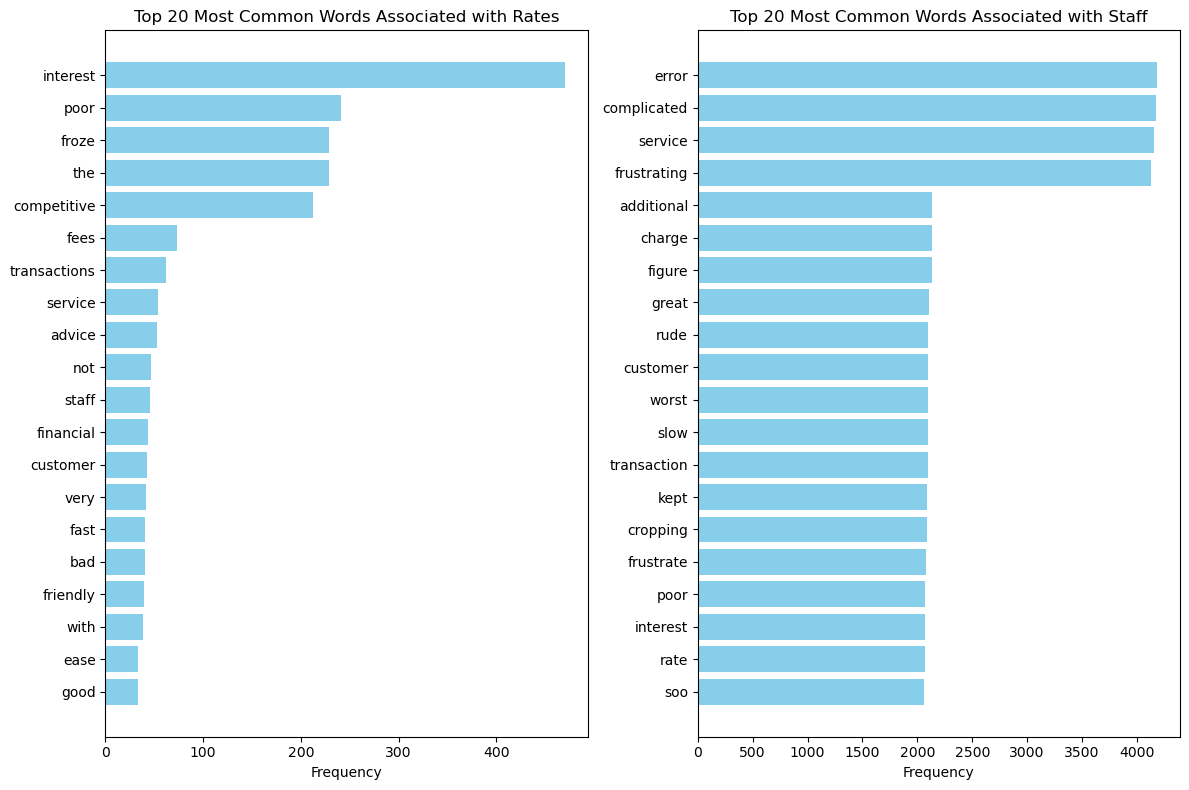

In [49]:
top_words_staff = [word for word, freq in most_common_words_staff[:20]]
top_freq_staff = [freq for word, freq in most_common_words_staff[:20]]
top_words_rates = [word for word, freq in most_common_words_rates[:20]]
top_freq_rates = [freq for word, freq in most_common_words_rates[:20]]

fig, axs = plt.subplots(1, 2, figsize=(12, 8))

axs[0].barh(top_words_rates, top_freq_rates, color='skyblue')
axs[0].set_xlabel('Frequency')
axs[0].set_title('Top 20 Most Common Words Associated with Rates')
axs[0].invert_yaxis()

axs[1].barh(top_words_staff, top_freq_staff, color='skyblue')
axs[1].set_xlabel('Frequency')
axs[1].set_title('Top 20 Most Common Words Associated with Staff')
axs[1].invert_yaxis() 

plt.tight_layout()
plt.show()


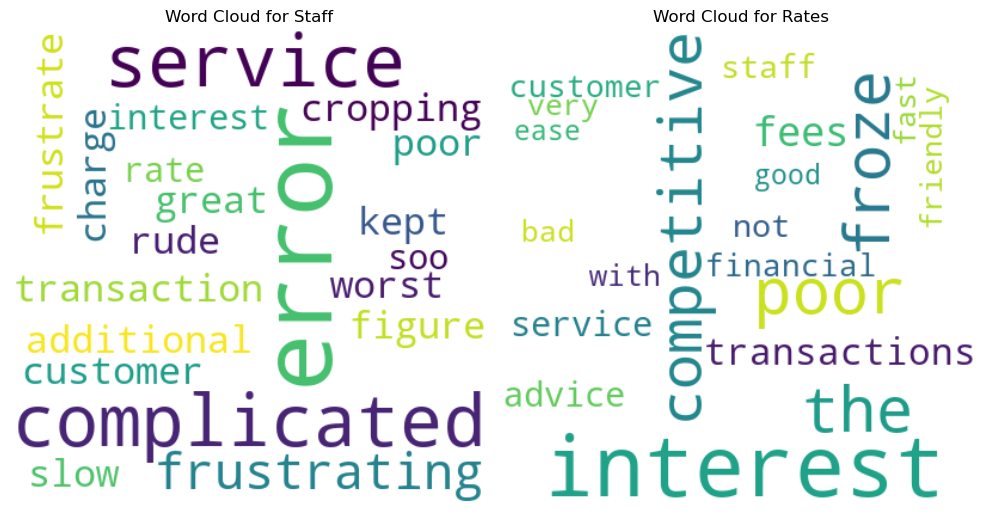

In [50]:
# Function to generate word cloud
def generate_word_cloud(ax, most_common_words, title):
    wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(most_common_words))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(title)
    ax.axis('off')

fig, axs = plt.subplots(1, 2, figsize=(10, 6))

generate_word_cloud(axs[0], dict(most_common_words_staff[:20]), 'Word Cloud for Staff')

generate_word_cloud(axs[1], dict(most_common_words_rates[:20]), 'Word Cloud for Rates')

plt.tight_layout()

plt.show()

In [51]:
words_example = re.compile(r'\b(staff|rates?)\b', flags=re.IGNORECASE)

# Find all matches in each element of the Series
matches = Q2['Review'].apply(lambda x: words_example.findall(x))

matches

0                    []
21              [staff]
22       [staff, staff]
23                   []
24              [staff]
              ...      
20912     [Rate, rates]
20913                []
20914    [Staff, rates]
20928           [staff]
20929    [staff, rates]
Name: Review, Length: 1833, dtype: object

## Q2 Part 3 - Which branch received the most positive rating proportionally to negative rating?

In [52]:
mortgage.head(5)

,Index,Date,Review,Rating,Product,District
0,1,01/01/2015,"Reliable, not bad fast transactions wide range...",5,Mortgage,6
21,22,02/01/2015,Not Great fees unhelpful staff slow transactio...,1,Mortgage,8
22,23,02/01/2015,High Fees unhelpful staff distressed by this u...,1,Mortgage,23
23,24,02/01/2015,Terrible Manager not great my mum long wait ti...,1,Mortgage,39
24,25,02/01/2015,Rising bad financial advice rude customer serv...,1,Mortgage,39


In [53]:
# Group by 'District' and count occurrences of each rating
Districts = mortgage.groupby('District')['Rating'].value_counts().unstack(fill_value=0)
# unstack() moves the 'Ratings' index level to become columns, which gives the counts of 
# each rating (1 and 5) as separate columns instead of 2 rows per District.

# Rename columns for clarity
Districts.columns = ['Rating 1', 'Rating 5']

# Reset index to make 'District' a column again
Districts = Districts.reset_index()
Districts

,District,Rating 1,Rating 5
0,1,2,1
1,2,6,5
2,3,9,84
3,4,4,4
4,5,9,4
...,...,...,...
71,72,9,2
72,73,4,3
73,74,7,4
74,75,2,2


In [75]:
Districts['Proportion'] = round(Districts['Rating 5']/Districts['Rating 1'], 2)

In [76]:
Districts.sort_values(by='Proportion', ascending=False)

,District,Rating 1,Rating 5,Proportion
49,50,0,3,inf
39,40,0,4,inf
35,36,3,85,28.33
15,16,4,95,23.75
75,76,5,98,19.60
...,...,...,...,...
7,8,102,4,0.04
54,55,100,2,0.02
10,11,84,2,0.02
38,39,90,2,0.02


## Additional Advanced Question - Vader

In [56]:
import nltk
# nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [57]:
# Apply polarity scoring function to each element of the 'Review' column
scores = df['Review'].apply(lambda x: sid.polarity_scores(x))

# Convert the resulting list of dictionaries into a DataFrame
score_df = pd.DataFrame(scores.tolist())
score_df

,neg,neu,pos,compound
0,0.000,0.647,0.353,0.7615
1,0.183,0.459,0.358,0.5859
2,0.290,0.499,0.211,-0.4118
3,0.231,0.466,0.303,0.2732
4,0.130,0.395,0.475,0.7269
...,...,...,...,...
20948,0.243,0.598,0.160,-0.3067
20949,0.499,0.501,0.000,-0.7896
20950,0.316,0.684,0.000,-0.7179
20951,0.413,0.461,0.126,-0.7820


In [58]:
Vader_df = df.merge(score_df, left_index=True, right_index=True)

In [59]:
Vader_df = Vader_df.drop(columns=['Index'])
Vader_df

,Date,Review,Rating,Product,District,neg,neu,pos,compound
0,01/01/2015,"Reliable, not bad fast transactions wide range...",5,Mortgage,6,0.000,0.647,0.353,0.7615
1,01/01/2015,Worried About Fraud But fast transactions wide...,5,Online Services,44,0.183,0.459,0.358,0.5859
2,01/01/2015,Helped Me In A Case Of Fraud competitive rates...,5,Online Services,24,0.290,0.499,0.211,-0.4118
3,01/01/2015,Stable Interest Rate competitive rates easy on...,5,Online Services,65,0.231,0.466,0.303,0.2732
4,01/01/2015,Where I Lost My Pin helpful customer service h...,5,Online Services,2,0.130,0.395,0.475,0.7269
...,...,...,...,...,...,...,...,...,...
20948,31/12/2016,What Happened To This Bank?? long wait times n...,1,Online Services,27,0.243,0.598,0.160,-0.3067
20949,31/12/2016,Soo Frustrating!Strange bad advice WHY!? frust...,1,Online Services,51,0.499,0.501,0.000,-0.7896
20950,31/12/2016,Slow Transactions long wait times complicated ...,1,Online Services,73,0.316,0.684,0.000,-0.7179
20951,31/12/2016,Bad Advice complicated to figure out what happ...,1,Online Services,9,0.413,0.461,0.126,-0.7820


In [79]:
Rating_5 = Vader_df[Vader_df['Rating'] == 5]
Rating_5.sample(5)

,Date,Review,Rating,Product,District,neg,neu,pos,compound
5340,08/11/2016,Secure From Fraud competitive rates where i lo...,5,Online Services,53,0.268,0.324,0.408,0.4939
4878,10/09/2016,Wide Range Of Services waved fees friendly sta...,5,Online Services,22,0.092,0.558,0.351,0.7579
15822,13/08/2017,Competitive Rates worried about fraud but help...,5,Online Services,73,0.342,0.563,0.096,-0.8674
18317,21/10/2016,Efficient easy online banking stable interest ...,5,Online Services,60,0.000,0.452,0.548,0.8720
7501,02/09/2017,Worried About Fraud But easy online banking wh...,5,Online Services,31,0.457,0.333,0.210,-0.7992
